# IMAGE ROTATION

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [13]:
test = Image.open("./flower_data_set/10443973_aeb97513fc_m_dandelion.jpg")

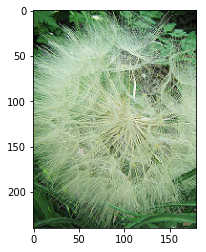

In [14]:
imgplot = plt.imshow(np.array(test))
plt.show()

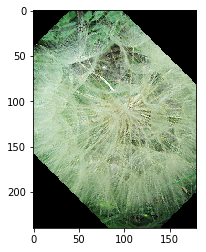

In [15]:
# Rotate 45 degree
test_45 = test.rotate(45)
imgplot = plt.imshow(np.array(test_45))
plt.show()

# IMAGE AUTOMATION CROP

In [28]:
import skimage.data
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import selectivesearch

path = "./"
filenames = ["test1.jpeg"]

def crop(filename):
    img  = skimage.io.imread(path+filename)

    # perform selective search
    img_lbl, regions = selectivesearch.selective_search(img, scale=900, sigma=0.9, min_size=1200)
    candidates = set()
    for r in regions:
        # in this part we deal with the rectangles set from SS, while we must select them, another idea is too add the parameter
        # of [CANDIDATE SIZE/LENGTH-WIDTH RATIO] into the selective search program.
        
        # excluding same rectangle (with different segments)
        if r['rect'] in candidates:
            continue
        # excluding regions smaller than 2000/1000 pixels
        if r['size'] < 30000:
        #if r['size'] < 1000:
            continue
        if r['size'] > 300000:
        #if r['size'] < 1000:
            continue
        # distorted rects， we only want the 'squared' rectangles, nerther too long or too short
        x, y, w, h = r['rect']
        if w / h > 2 or h / w > 2:
            continue
        candidates.add(r['rect'])

    # draw rectangles on the original image
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
    ax.imshow(img)
    for x, y, w, h in candidates:
        print(x, y, w, h)
        rect = mpatches.Rectangle(
            (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(rect)

    plt.show()


234 634 699 395
239 634 688 395
234 634 693 395


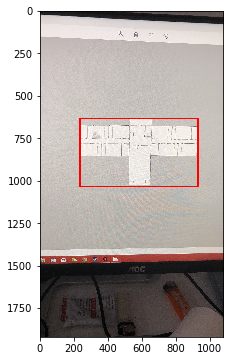

In [29]:
crop("test1.jpeg")